# MA313: Week 11 - Least Squars in R <span style='color:green'>(V1.0)</span>


**Example of using R for solving a least squares problem. Week 11 of MA313, 18 November, 2022.**

Dr [Niall Madden](mailto:Niall.Madden@UniversityOfGalway.ie), School of Mathematical and Statistical Sciences, 
University of Galway.
            
You can find these slides as a Jupyter notebook on
* Blackboard (as an .ipynb file)
* Binder [https://mybinder.org/v2/gh/niallmadden/2223-MA313/main](https://mybinder.org/v2/gh/niallmadden/2223-MA313/main) [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/niallmadden/2223-MA313/main)


***

<em>This notebook was written by Niall Madden, and uses some material from 
[Linear Algebra for Data Science with examples in R](https://shainarace.github.io/LinearAlgebra/) by Shaina Race Bennett</em>

We will try to fit a line to the data points
$$(-2,-1), ~ (-1,-1), ~ (0,1), ~ (1,2),  ~ (2,2), ~ (3,4), ~ (4,3)$$

We'll represent this data in a data-frame, with columns labeled $Y$ and $Y$.values.

In [25]:
my_data <- data.frame(
    X = c(-2, -1, 0,  1,  2, 3,  4),
    Y = c(-1,  0, 1,  2,  2, 4,  3)
    )

In [26]:
my_data

X,Y
-2,-1
-1,0
0,1
1,2
2,2
3,4
4,3


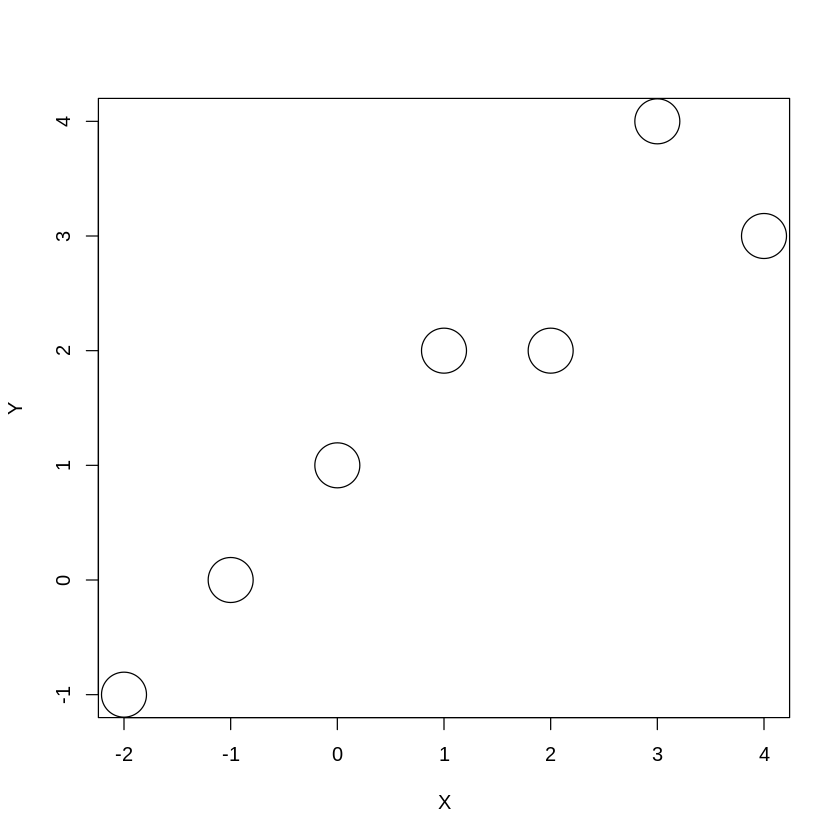

In [27]:
plot(my_data, cex=5)

We want to represent the problem as a matrix-vector equation. The R function `model.matrix()` will do this for us.

In [29]:
A = model.matrix(Y~X, data=my_data)
A

(Intercept),X
1,-2
1,-1
1,0
1,1
1,2
1,3
1,4


In [31]:
b=my_data$Y
b

[1] -1  0  1  2  2  4  3

We'll also need the transpose of the matrix, $A$. The function `t(A)` will do this for us.

In [32]:
t(A)

,1,2,3,4,5,6,7
(Intercept),1,1,1,1,1,1,1
X,-2,-1,0,1,2,3,4


Now we will solve the linear system
$$A^\top Ax = A^\top b.$$
For that we have to use matrix-matrix and matrix-vector multiplication. In `R`, this is done with the `%*%` operator. We'll also use the `solve()` function to solve the linear system.

In [33]:
(u=solve(t(A) %*% A ,t(A)%*%b))

(Intercept),0.8214286
X,0.7500000


Now plot the result. 

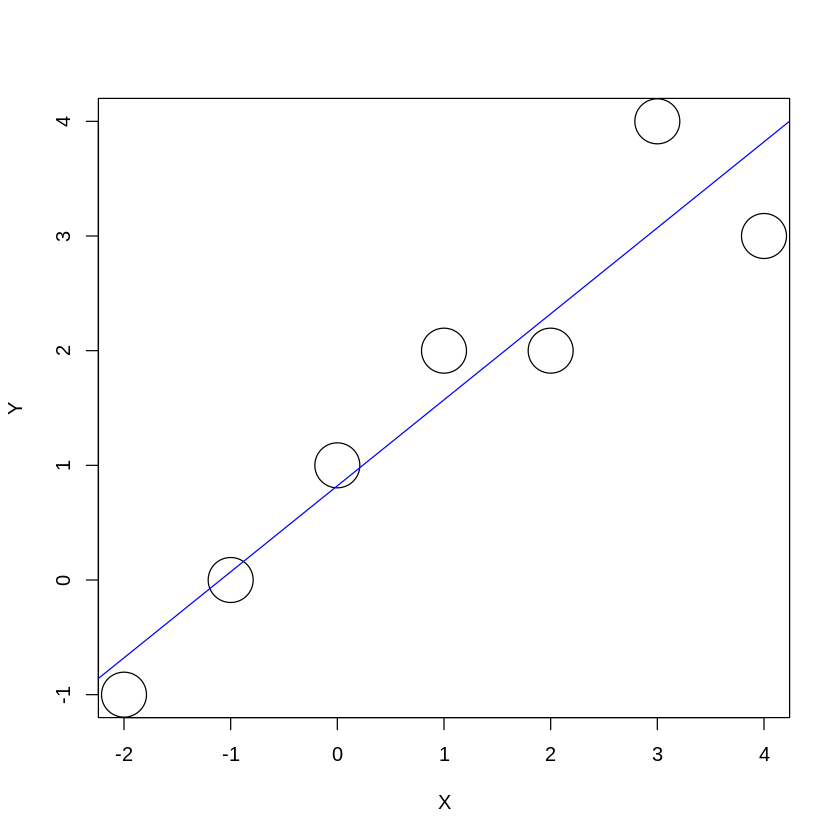

In [34]:
plot(my_data, cex=5)
abline(u[1], u[2],col='blue')

Try changing the data, and see if you get expected results.